# Продолжение кода ВКР

## Разработка и обучение моделей

Учитывая тот факт, что прогнозируемые переменные - непрерывные, для выполнения задачи прогнозирования модуля упругости при растяжении целесообразно использовать **регрессионные модели**.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

### Прогнозирование модуля упругости при растяжении

#### Multiple Linear Regression model

Строя модели, будем двигаться от простого к сложному.

Рассмотрим модель множественной линейной регрессии при стандартных параметрах. Вероятность удовлетворительного прогноза - практически нулевая, ведь на этапе разведочного анализа данных никаких линейный корреляционных связей обнаружено не было. Тем не мене, в учебных целях разработаем модель и посмотрим на результаты.

In [2]:
# загрузим данные - готовый датасет после избавления от выбросов
# повторим нормализацию с помощью MinMaxScaler отдельно для зависимой и независимых переменных
df = pd.read_csv('/Users/kusita_1/Desktop/df compositum clean.csv', index_col=0)
df.head(3)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,36.513195,22.267857,178.163161,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1,1.857143,2030.0,738.736842,50.000000,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2,1.857143,2030.0,738.736842,49.900000,28.992783,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,70.0


In [3]:
# выполним нормализацию повторно, но теперь отдельно для зависимой и независимых переменных
# сформируем датасеты независимых признаков - x и y для зависимой переменной - модуль упругости при растяжении
min_max_scaler_x = preprocessing.MinMaxScaler()
min_max_scaler_y = preprocessing.MinMaxScaler()

df_scaled_x = min_max_scaler_x.fit_transform(df.drop('Модуль упругости при растяжении, ГПа', axis=1))
df_scaled_y = min_max_scaler_y.fit_transform(df[['Модуль упругости при растяжении, ГПа']])

In [4]:
# посмотрим на массив с независимыми признаками
df_scaled_x[:3]

array([[0.2817149 , 0.64718094, 0.44569587, 0.        , 0.49872336,
        0.        , 0.15717681, 0.71718721, 0.5046413 , 0.        ,
        0.28889872, 0.49385823],
       [0.2817149 , 0.64718094, 0.44569587, 0.09042597, 0.60920244,
        0.49342302, 0.15717681, 0.71718721, 0.5046413 , 0.        ,
        0.28889872, 0.54337708],
       [0.2817149 , 0.64718094, 0.44569587, 0.08975549, 1.        ,
        0.49342302, 0.15717681, 0.71718721, 0.5046413 , 0.        ,
        0.28889872, 0.7084399 ]])

In [5]:
# посмотрим на набор значений зависимой переменной
df_scaled_y[:3]

array([[0.29929831],
       [0.29929831],
       [0.29929831]])

In [6]:
# разобъем наборы на тестовую и тренировочную выборки (на 30% и 70%, соответственно, по условиям задачи)
x_scaled_train, x_scaled_test, y_scaled_train, y_scaled_test = train_test_split(df_scaled_x, df_scaled_y, train_size=0.7, random_state=73)

In [7]:
# проверим размерность получившихся массивов 
print(x_scaled_train.shape)
print(x_scaled_test.shape)
print(y_scaled_train.shape)
print(y_scaled_test.shape)

(716, 12)
(307, 12)
(716, 1)
(307, 1)


In [8]:
# обучим модель
lr = LinearRegression()
lr.fit(x_scaled_train, y_scaled_train)

LinearRegression()

In [9]:
# выведением значение перечения прямой оси у
print(lr.intercept_)

[0.49657866]


In [10]:
# выведем коэффициенты регрессии
lr.coef_

array([[-0.00474641, -0.0454025 ,  0.02444196, -0.04340788,  0.03252058,
        -0.00331537,  0.03700128, -0.01797942,  0.03041083, -0.00241301,
        -0.0013705 ,  0.02009297]])

In [11]:
# напишем уравнение линейной регрессии, где У - зависимая переменная, intercept - свободный член
df_x = df.drop('Модуль упругости при растяжении, ГПа', axis=1)
str1 = f"Y = {lr.intercept_} + "
for coef, column in zip(lr.coef_.ravel(), df_x.columns):
    str1 += str(np.round(coef, 3)) + " * " + str(column) + " + "
str1

'Y = [0.49657866] + -0.005 * Соотношение матрица-наполнитель + -0.045 * Плотность, кг/м3 + 0.024 * модуль упругости, ГПа + -0.043 * Количество отвердителя, м.% + 0.033 * Содержание эпоксидных групп,%_2 + -0.003 * Температура вспышки, С_2 + 0.037 * Поверхностная плотность, г/м2 + -0.018 * Прочность при растяжении, МПа + 0.03 * Потребление смолы, г/м2 + -0.002 * Угол нашивки, град + -0.001 * Шаг нашивки + 0.02 * Плотность нашивки + '

In [12]:
# спрогнозируем значения модули упругости при растяжении
y_pred = lr.predict(x_scaled_test)
# преобразуем массив в таблицу pandas
y_pred = pd.DataFrame(y_pred)
y_pred.head(3)

,0
0,0.495580
1,0.523245
2,0.514988


In [13]:
# преобразуем массив тестовых данных в таблицу pandas
y_scaled_test = pd.DataFrame(y_scaled_test)
y_scaled_test.head(3)

,0
0,0.670182
1,0.387134
2,0.187817


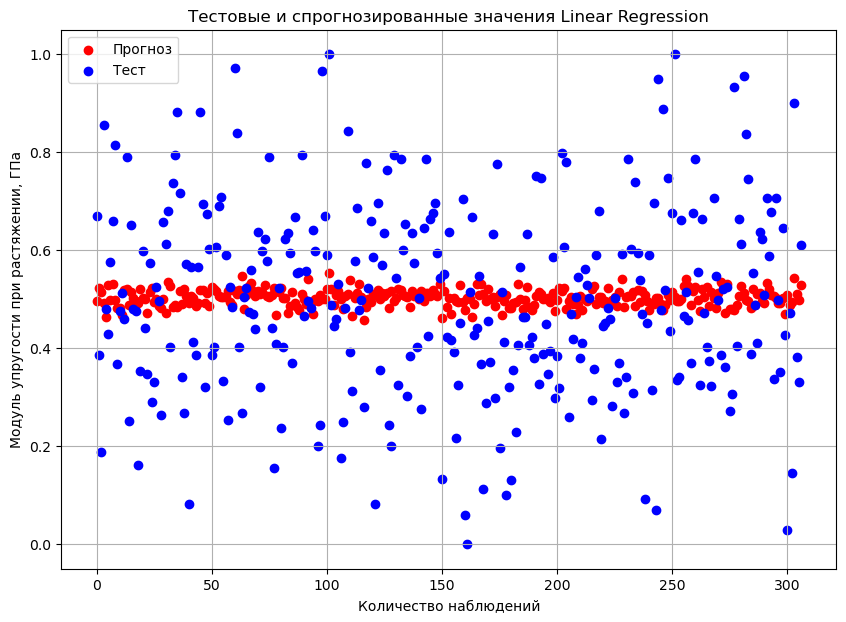

In [14]:
# визуализируем настоящие (отмечены синим цветом) и прогнозные значения (отмечены красным цветом)
plt.figure(figsize = (10, 7))
plt.title("Тестовые и спрогнозированные значения Linear Regression")
plt.scatter(y_pred.index, y_pred, label = "Прогноз", color = "r")
plt.scatter(y_scaled_test.index, y_scaled_test, label = "Тест", color = "b")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

Вывод: прогноз неудовлетворительный, как и ожидалось.

In [15]:
# используем встроенные в библиотеку sklearn метрики для вычисления ошибки
y_pred = np.array(y_pred)
y_scaled_test = np.array(y_scaled_test)
lr_rmse = np.sqrt(metrics.mean_squared_error(y_scaled_test, y_pred))
lr_r2_score = r2_score(y_scaled_test, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_scaled_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_scaled_test, y_pred))
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_scaled_test, y_pred)))
print('r2 score:', r2_score(y_scaled_test, y_pred))

Mean Absolute Error: 0.15243829801203632
Mean Squared Error: 0.036248290687953086
Root Mean Squared Error: 0.19038983872032952
r2 score: 0.0168091806961701


In [16]:
# вернем значения в исходный вид
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = min_max_scaler_y.inverse_transform(y_pred)

y_test_df = pd.DataFrame(y_scaled_test)
y_test_df = min_max_scaler_y.inverse_transform(y_scaled_test)

In [17]:
# посмотрим первые 3 спрогнозированных значения модуля упругости при растяжении
y_pred_df[:3]

array([[73.22811947],
       [73.68311237],
       [73.54730766]])

In [18]:
# посмотрим первые 3 настоящих значения модуля упругости при растяжении
y_test_df[:3]

array([[76.09969661],
       [71.44458144],
       [68.16653391]])

In [19]:
# создадим словарь для последующего формирования таблицы с результатами для каждой модели 
metrics_df = {'Регрессор': ['Linear_Regression'], 'RMSE': [lr_rmse], 'r2 score': [lr_r2_score]}
metrics_df = pd.DataFrame(metrics_df)
metrics_df

,Регрессор,RMSE,r2 score
0,Linear_Regression,0.19039,0.016809


Вывод по первой модели:

модель дает прогноз хуже наивного. 

In [20]:
# загрузим таблицу с нормализованными с помощью Normalizer() данными без целевого столбца - 'Модуль упругости при растяжении, ГПа'
df_norm_x = pd.read_csv('/Users/kusita_1/Desktop/df compositum norm elasticity.csv', index_col=0)

In [21]:
df_norm_x.head(3)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.000500,0.546537,0.198890,0.009830,0.005995,0.047967,0.056538,0.807691,0.059231,0.0,0.001077,0.015346
1,0.000499,0.545533,0.198525,0.013437,0.006382,0.076486,0.056434,0.806206,0.059122,0.0,0.001075,0.016124
2,0.000499,0.545502,0.198514,0.013409,0.007791,0.076482,0.056431,0.806161,0.059118,0.0,0.001075,0.018810


In [22]:
# разобъем наборы на тестовую и тренировочную выборки (на 30% и 70%, соответственно, по условиям задачи)
df_norm_y = df[['Модуль упругости при растяжении, ГПа']]
x_norm_train, x_norm_test, y_norm_train, y_norm_test = train_test_split(df_norm_x, df_norm_y, train_size=0.7, random_state=73)

In [23]:
# проверим размерность получившихся массивов 
print(x_norm_train.shape)
print(x_norm_test.shape)
print(y_norm_train.shape)
print(y_norm_test.shape)

(716, 12)
(307, 12)
(716, 1)
(307, 1)


In [24]:
# обучим модель
lr = LinearRegression()
lr.fit(x_norm_train, y_norm_train)

LinearRegression()

In [25]:
# спрогнозируем значения модули упругости при растяжении
y_pred = lr.predict(x_norm_test)

In [26]:
# используем встроенные в библиотеку sklearn метрики для вычисления ошибки
lr_norm_rmse = np.sqrt(metrics.mean_squared_error(y_norm_test, y_pred))
lr_norm_r2_score = r2_score(y_norm_test, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_norm_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_norm_test, y_pred))
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_norm_test, y_pred)))
print('r2 score:', r2_score(y_norm_test, y_pred))

Mean Absolute Error: 2.5043655870354025
Mean Squared Error: 9.773851406199336
Root Mean Squared Error: 3.1263159479168667
r2 score: 0.0198881181660292


In [27]:
# приведем наборы значений зависимой переменной к табличному виду для последующей визуализации
y_pred = pd.DataFrame(y_pred)
y_norm_test = pd.DataFrame(y_norm_test).reset_index(drop=True)
y_norm_test.head(3)


,"Модуль упругости при растяжении, ГПа"
0,76.099697
1,71.444581
2,68.166534


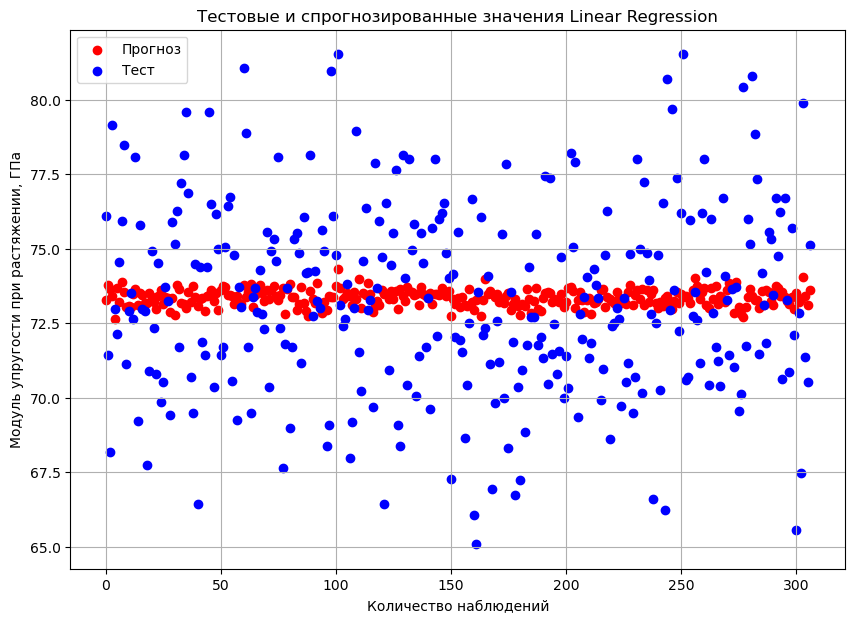

In [28]:
# визуализируем настоящие (отмечены синим цветом) и прогнозные значения (отмечены красным цветом)
plt.figure(figsize = (10, 7))
plt.title("Тестовые и спрогнозированные значения Linear Regression")
plt.scatter(y_pred.index, y_pred, label = "Прогноз", color = "r")
plt.scatter(y_norm_test.index, y_norm_test, label = "Тест", color = "b")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

Вывод: 
прогноз хуже наивного.

In [29]:
# добавим в таблицу данные по второй модели
metrics_df.loc[len(metrics_df.index)] = ['Linear_Regression_sample_normalization', lr_norm_rmse, lr_norm_r2_score] 
metrics_df

,Регрессор,RMSE,r2 score
0,Linear_Regression,0.190390,0.016809
1,Linear_Regression_sample_normalization,3.126316,0.019888


Попробуем подать в модель измененный характер значений в столбце "Угол нашивки". Он имеет только два уникальных значения и чтобы не ограничивать модель ранее планировалось оставить его без изменений, однако при плохом прогнозе ограничения уже не имеют смысла. Изменим тип значений в столбце на категориальный.

In [30]:
# загрузим таблицу с итоговым датасетом до отсеивания выбросов и до нормализации
df = pd.read_csv('/Users/kusita_1/Desktop/df compositum.csv', index_col=0)
df.head(3)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.0,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.0,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.9,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0


In [31]:
# повторим обучение модели, извенив значения в столбце "Угол нашивки" на категориальные
# приведем столбец "Угол нашивки" к значениям 0 и 1 
df_categ_angle = df.replace({'Угол нашивки, град': {0.0 : 0, 90.0 : 1}})
# изменим тип данных в столбце на integer
df_categ_angle['Угол нашивки, град'] = df_categ_angle['Угол нашивки, град'].astype(int)
df_categ_angle.head(3)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.0,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.0,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.9,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0


In [32]:
# проверим значения в стобце "Угол нашивки"
df_categ_angle['Угол нашивки, град'].value_counts()

Угол нашивки, град
0    520
1    503
Name: count, dtype: int64

In [33]:
# переименуем столбец, так как значения поменялись на категориальные 
df_categ_angle = df_categ_angle.rename(columns={'Угол нашивки, град' : 'Угол нашивки'})
df_categ_angle.head(3)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.0,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.0,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.9,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0


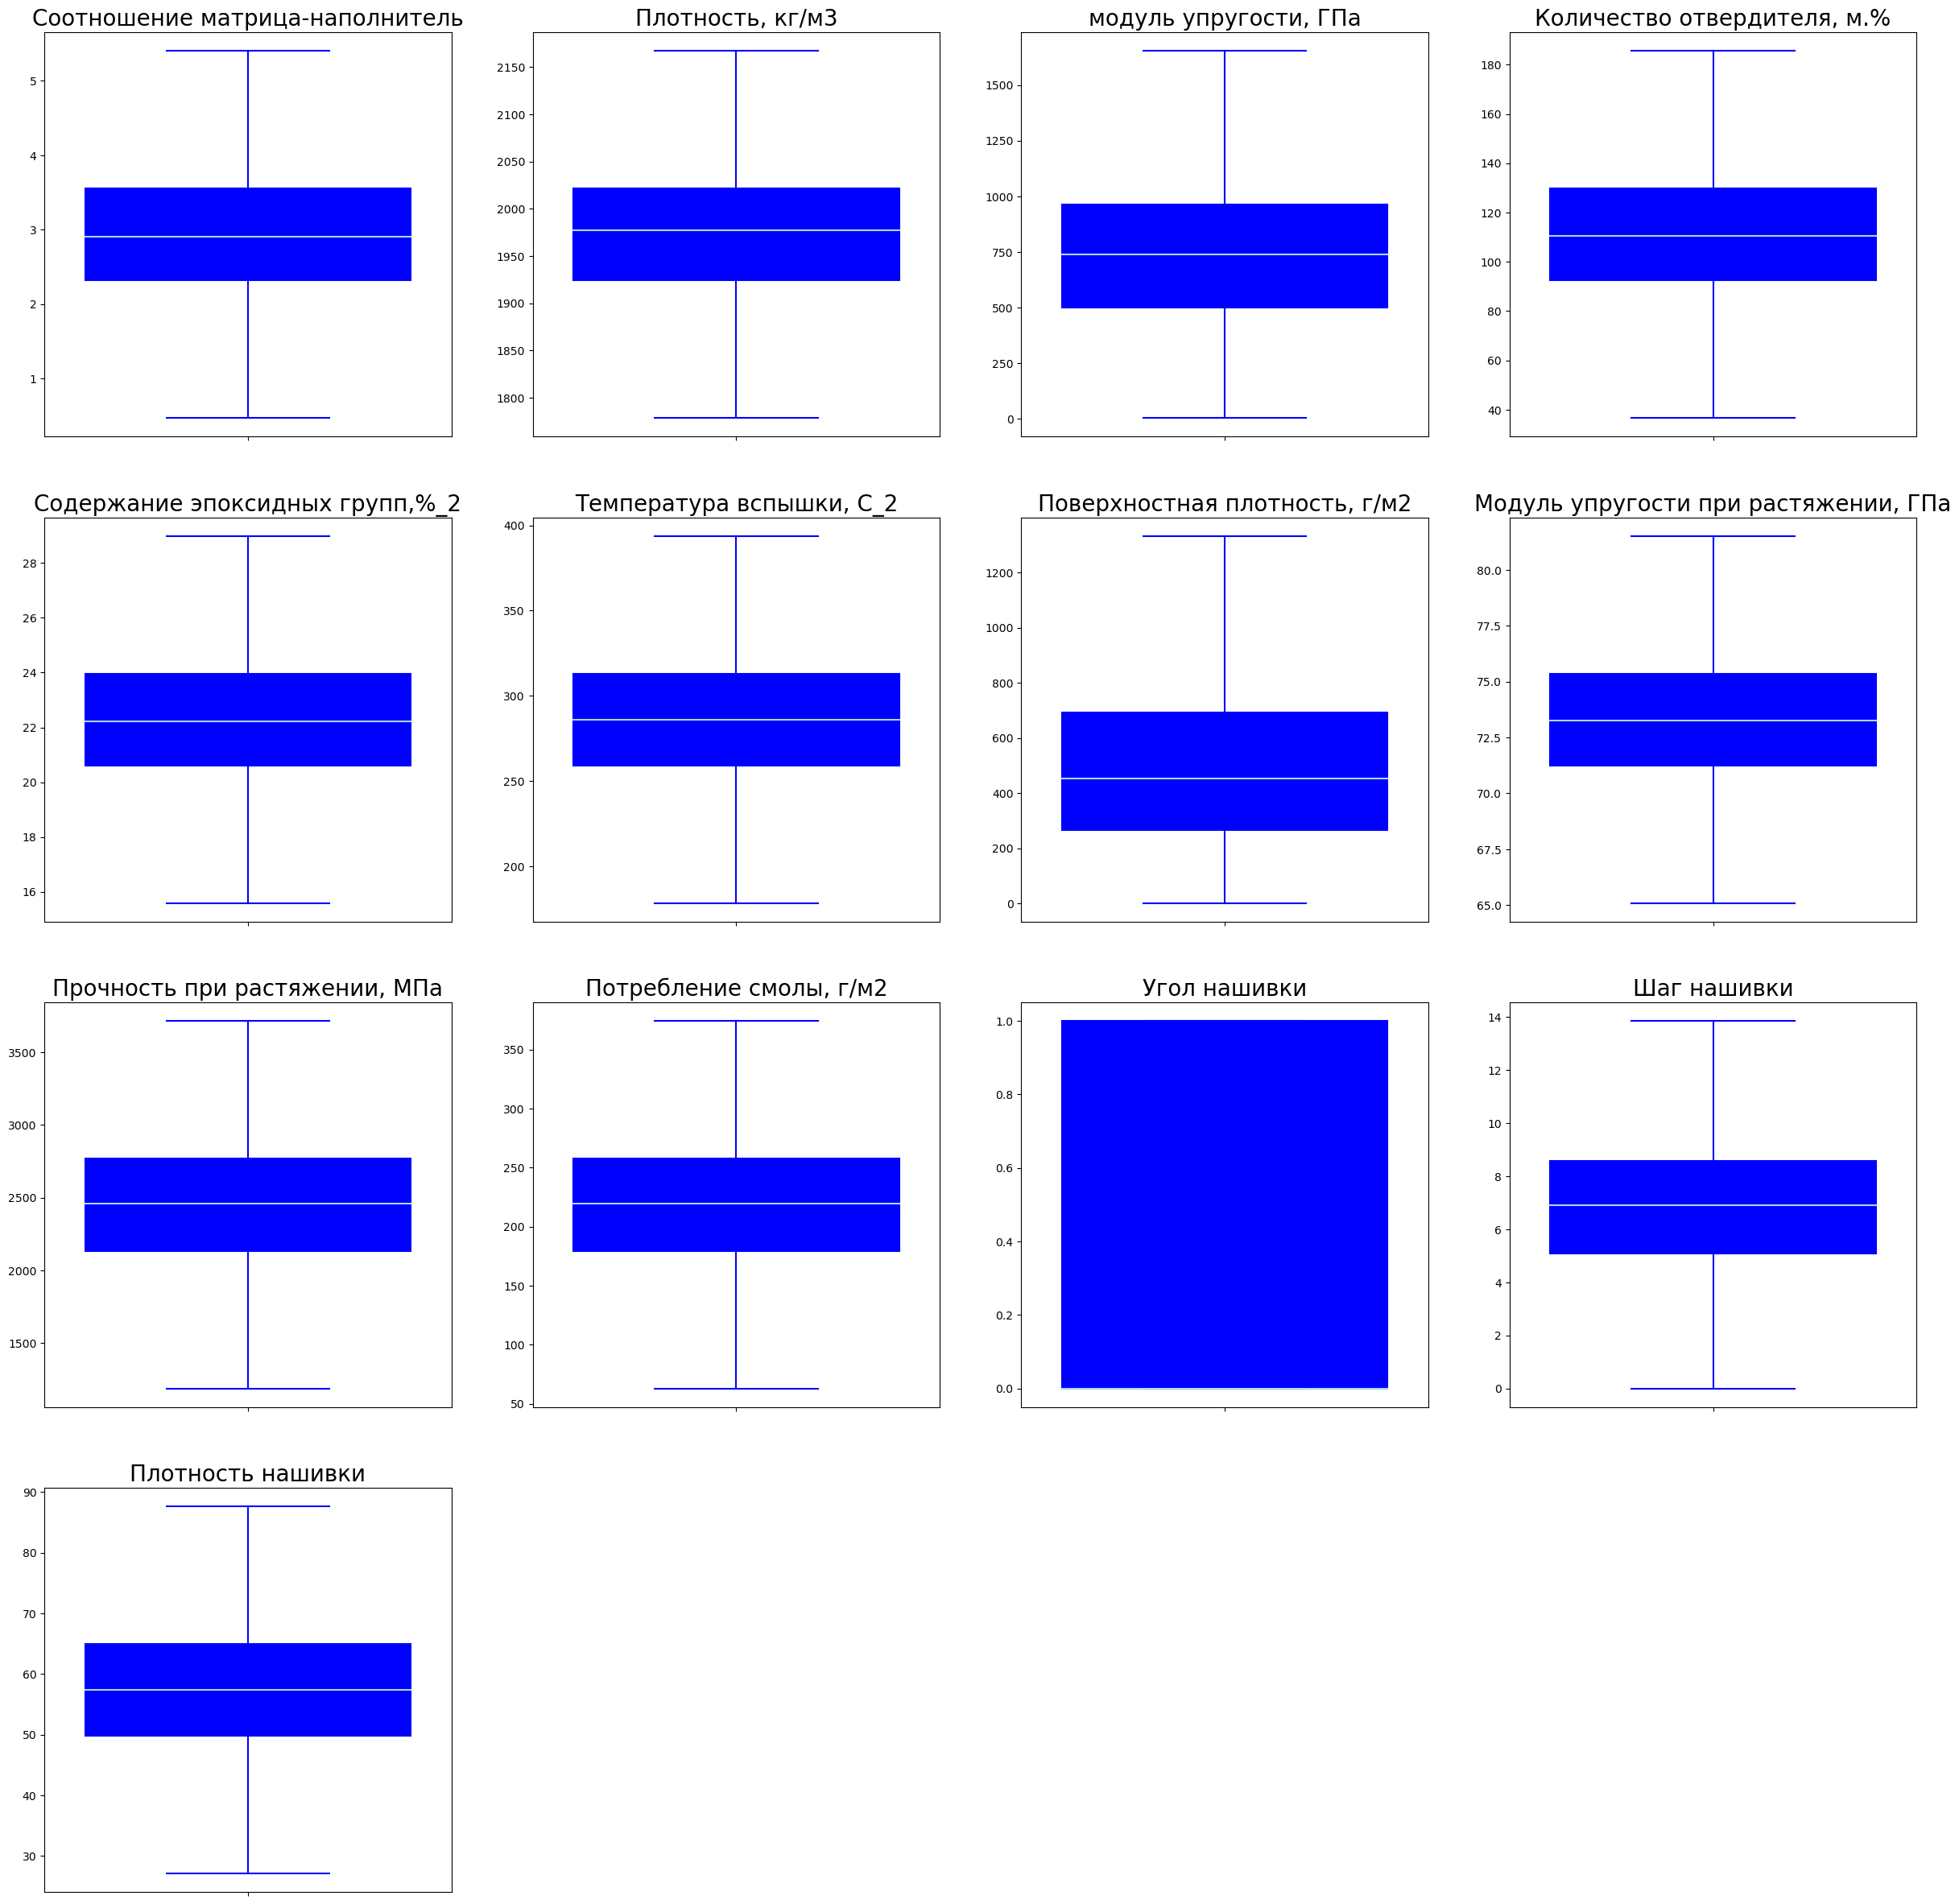

In [34]:
# повторим процедуру исправления выбросов, несмотря на их отсутствие в столбце "Угол нашивки", но присутствие в других стобцах
# заменим выбросы во всех столбцах, где они есть, на верхние и нижние предельные значения
# визуализируем результат для каждого из столбцов с помощью "ящика с усами"
plt.figure(figsize = (30,30)) 
columns = 4 # количество стобцов для распределения графиков
rows = 4 # количество рядов
plot_number = 1 # инициализируем счетчик графиков
for column in df_categ_angle.columns:
    q1 = df_categ_angle[column].quantile(0.25)
    q3 = df_categ_angle[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_categ_angle[column] = np.where(df_categ_angle[column] > upper_bound, upper_bound, np.where(df_categ_angle[column] < lower_bound, lower_bound, df_categ_angle[column]))
    plt.subplot(rows, columns, plot_number)
    sns.boxplot(data=df_categ_angle, y = df_categ_angle[column], meanline = True, boxprops = dict(facecolor = 'b', color = 'b'), \
            medianprops = dict(color = 'lightblue'), whiskerprops = dict(color = 'b'), capprops = dict(color = 'b'), flierprops = dict(markeredgecolor = 'maroon'))
    plt.ylabel(None)
    plt.xlabel(None)
    plt.title(column, size = 20)
    plot_number += 1

In [35]:
# выполним нормализацию отдельно для зависимой и независимых переменных
# сформируем датасеты независимых признаков - x и y для зависимой переменной - модуль упругости при растяжении
min_max_scaler_x = preprocessing.MinMaxScaler()
min_max_scaler_y = preprocessing.MinMaxScaler()

df_scaled_x = min_max_scaler_x.fit_transform(df_categ_angle.loc[:, df_categ_angle.columns != 'Модуль упругости при растяжении, ГПа'])
df_scaled_y = min_max_scaler_y.fit_transform(df_categ_angle[['Модуль упругости при растяжении, ГПа']])

In [36]:
# разобъем наборы на тестовую и тренировочную выборки (на 30% и 70%, соответственно, по условиям задачи)
x_scaled_train, x_scaled_test, y_scaled_train, y_scaled_test = train_test_split(df_scaled_x, df_scaled_y, train_size=0.7, random_state=73)

In [37]:
# проверим размерность получившихся массивов 
print(x_scaled_train.shape)
print(x_scaled_test.shape)
print(y_scaled_train.shape)
print(y_scaled_test.shape)

(716, 12)
(307, 12)
(716, 1)
(307, 1)


In [38]:
# обучим модель
lr = LinearRegression()
lr.fit(x_scaled_train, y_scaled_train)

LinearRegression()

In [39]:
# спрогнозируем значения модули упругости при растяжении
y_pred = lr.predict(x_scaled_test)
# преобразуем массив в таблицу pandas
y_pred = pd.DataFrame(y_pred)
y_pred.head(3)

,0
0,0.495580
1,0.523245
2,0.514988


In [40]:
# преобразуем массив тестовых данных в таблицу pandas
y_scaled_test = pd.DataFrame(y_scaled_test)
y_scaled_test.head(3)

,0
0,0.670182
1,0.387134
2,0.187817


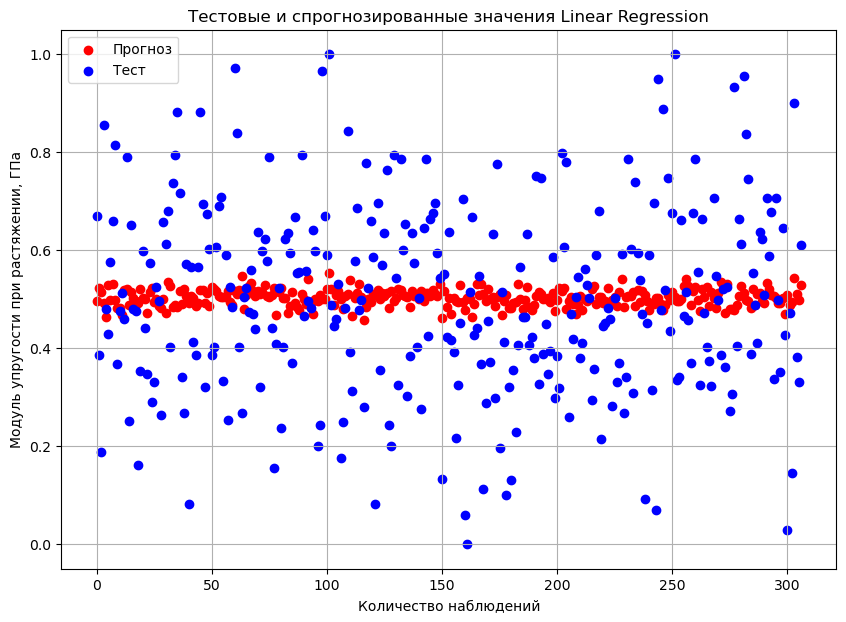

In [41]:
# визуализируем настоящие (отмечены синим цветом) и прогнозные значения (отмечены красным цветом)
plt.figure(figsize = (10, 7))
plt.title("Тестовые и спрогнозированные значения Linear Regression")
plt.scatter(y_pred.index, y_pred, label = "Прогноз", color = "r")
plt.scatter(y_scaled_test.index, y_scaled_test, label = "Тест", color = "b")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [42]:
# используем встроенные в библиотеку sklearn метрики для вычисления ошибки
y_pred = np.array(y_pred)
y_scaled_test = np.array(y_scaled_test)
lr_categ_angle_rmse = np.sqrt(metrics.mean_squared_error(y_scaled_test, y_pred))
lr_categ_angle_r2_score = r2_score(y_scaled_test, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_scaled_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_scaled_test, y_pred))
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_scaled_test, y_pred)))
print('r2 score:', r2_score(y_scaled_test, y_pred))

Mean Absolute Error: 0.1524382980120363
Mean Squared Error: 0.036248290687953086
Root Mean Squared Error: 0.19038983872032952
r2 score: 0.0168091806961701


In [43]:
# добавим в таблицу данные по модели, получившей нормализованные по MinMaxScaler() признаки и категориальные значения в стобце "Угол нашивки"
metrics_df.loc[len(metrics_df.index)] = ['Linear_Regression_categ_angle', lr_categ_angle_rmse, lr_categ_angle_r2_score] 
metrics_df

,Регрессор,RMSE,r2 score
0,Linear_Regression,0.190390,0.016809
1,Linear_Regression_sample_normalization,3.126316,0.019888
2,Linear_Regression_categ_angle,0.190390,0.016809


Вывод: изменение типа данных в стобце "Угол нашивки" не привело ни к каким изменениям относительно прогноза. Это объясняется тем, что после нормализации с помощью MinMaxScaler() в столбце "Угол нашивки" в любом случае оказались минимальное значение - 0, а максимальное - 1. 

In [44]:
# посмотрим, может ли изменить прогноз нормализация датасета функцией normalize()
df_elasticity = df_categ_angle.drop('Модуль упругости при растяжении, ГПа', axis=1)
df_normalized_sample_categ_angle = preprocessing.normalize(np.array(df_elasticity))
df_normalized_sample_categ_angle = pd.DataFrame(df_normalized_sample_categ_angle, columns=df_elasticity.columns)
df_normalized_sample_categ_angle.head(3) 

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,0.000500,0.546537,0.198890,0.009830,0.005995,0.047967,0.056538,0.807691,0.059231,0.0,0.001077,0.015346
1,0.000499,0.545533,0.198525,0.013437,0.006382,0.076486,0.056434,0.806206,0.059122,0.0,0.001075,0.016124
2,0.000499,0.545502,0.198514,0.013409,0.007791,0.076482,0.056431,0.806161,0.059118,0.0,0.001075,0.018810


In [45]:
# разобъем наборы на тестовую и тренировочную выборки (на 30% и 70%, соответственно, по условиям задачи)
df_norm_y = df_categ_angle[['Модуль упругости при растяжении, ГПа']]
x_norm_train, x_norm_test, y_norm_train, y_norm_test = train_test_split(df_normalized_sample_categ_angle, df_norm_y, train_size=0.7, random_state=73)

In [46]:
# проверим размерность получившихся массивов 
print(x_norm_train.shape)
print(x_norm_test.shape)
print(y_norm_train.shape)
print(y_norm_test.shape)

(716, 12)
(307, 12)
(716, 1)
(307, 1)


In [47]:
# обучим модель
lr = LinearRegression()
lr.fit(x_norm_train, y_norm_train)

LinearRegression()

In [48]:
# спрогнозируем значения модули упругости при растяжении
y_pred = lr.predict(x_norm_test)

In [49]:
# используем встроенные в библиотеку sklearn метрики для вычисления ошибки
lr_norm_categ_angle_rmse = np.sqrt(metrics.mean_squared_error(y_norm_test, y_pred))
lr_norm_categ_angle_r2_score = r2_score(y_norm_test, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_norm_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_norm_test, y_pred))
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_norm_test, y_pred)))
print('r2 score:', r2_score(y_norm_test, y_pred))

Mean Absolute Error: 2.504365568038246
Mean Squared Error: 9.773827928196775
Root Mean Squared Error: 3.1263121930154023
r2 score: 0.01989047251625564


In [50]:
# приведем наборы значений зависимой переменной к табличному виду для последующей визуализации
y_pred = pd.DataFrame(y_pred)
y_norm_test = pd.DataFrame(y_norm_test).reset_index(drop=True)
y_norm_test.head(3)

,"Модуль упругости при растяжении, ГПа"
0,76.099697
1,71.444581
2,68.166534


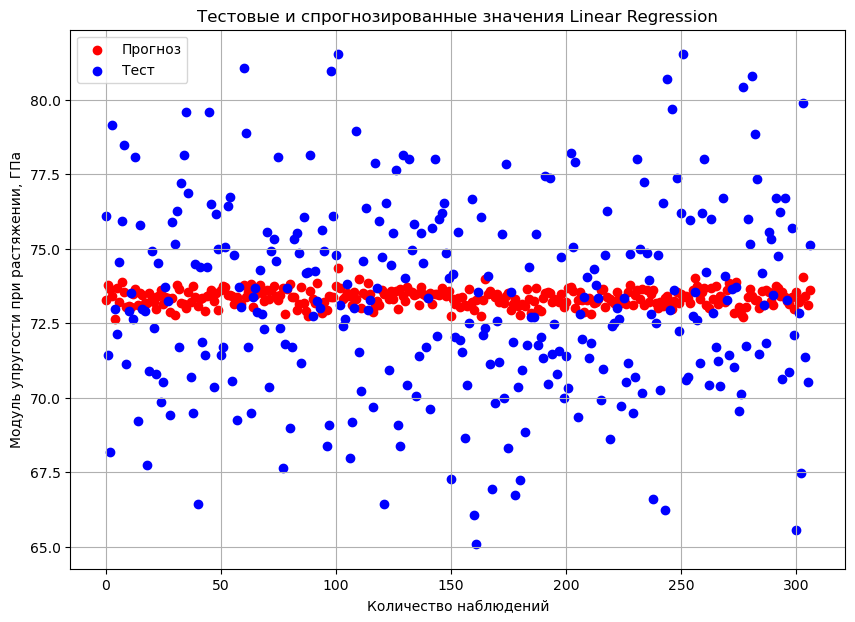

In [51]:
# визуализируем настоящие (отмечены синим цветом) и прогнозные значения (отмечены красным цветом)
plt.figure(figsize = (10, 7))
plt.title("Тестовые и спрогнозированные значения Linear Regression")
plt.scatter(y_pred.index, y_pred, label = "Прогноз", color = "r")
plt.scatter(y_norm_test.index, y_norm_test, label = "Тест", color = "b")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [52]:
# добавим в таблицу данные по этой модели
metrics_df.loc[len(metrics_df.index)] = ['Linear_Regression_sample_normalization_categ_angle', lr_norm_categ_angle_rmse, lr_norm_categ_angle_r2_score] 
metrics_df

,Регрессор,RMSE,r2 score
0,Linear_Regression,0.190390,0.016809
1,Linear_Regression_sample_normalization,3.126316,0.019888
2,Linear_Regression_categ_angle,0.190390,0.016809
3,Linear_Regression_sample_normalization_categ_a...,3.126312,0.019890


Вывод: изменение типа данных в стобце "Угол нашивки" не привело ни к каким изменениям относительно качества прогноза. 

Несмотря на то, что нормализация по образцам материала (по рядам в массиве) позволила предположить о наличии линейных взаимосвязей, линейный регрессор не смог обучиться и выдать прогноз лучше наивного.

Очевидно, что использование линейных моделей не принесет результата.

В дальнейшей работе будем использовать модели, основанные на нелинейных взаимоотношениях переменных.

#### Support Vector Regressor model

Учитывая небольшие размеры датасета, наличие четких границ между зависимыми переменными, судя по разведочному анализу данных, в качестве первого метода, использующим нелинейную функцию для прогнозирования, применим метод опорных векторов.

In [53]:
# первоначально будем использовать нормализованный с помощью MinMaxScaler() датасет, оставив столбец "Угол нашивки" в качестве непрерывной переменной
# разобъем наборы на тестовую и тренировочную выборки (на 30% и 70%, соответственно, по условиям задачи)
x_scaled_train, x_scaled_test, y_scaled_train, y_scaled_test = train_test_split(df_scaled_x, df_scaled_y, train_size=0.7, random_state=73)

In [54]:
# проверим размерность получившихся массивов 
print(x_scaled_train.shape)
print(x_scaled_test.shape)
print(y_scaled_train.shape)
print(y_scaled_test.shape)

(716, 12)
(307, 12)
(716, 1)
(307, 1)


In [55]:
# обучим модель
y_scaled_train = np.array(y_scaled_train).ravel()
svr = SVR(kernel = 'rbf', C = 50, epsilon= 0.3)
svr.fit(x_scaled_train, y_scaled_train)

SVR(C=50, epsilon=0.3)

In [56]:
# спрогнозируем значения модули упругости при растяжении
y_pred = svr.predict(x_scaled_test)

In [57]:
# используем встроенные в библиотеку sklearn метрики для вычисления ошибки
svr_rmse = np.sqrt(metrics.mean_squared_error(y_scaled_test, y_pred))
svr_r2_score = r2_score(y_scaled_test, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_scaled_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_scaled_test, y_pred))
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_scaled_test, y_pred)))
print('r2 score:', r2_score(y_scaled_test, y_pred))

Mean Absolute Error: 0.15848031907696153
Mean Squared Error: 0.0393095390722181
Root Mean Squared Error: 0.1982663336833011
r2 score: -0.06622346028897641


In [58]:
# преобразуем массив в таблицу pandas
y_pred = pd.DataFrame(y_pred)
y_pred.head(3)

,0
0,0.538464
1,0.462394
2,0.523946


In [59]:
# преобразуем массив тестовых данных в таблицу pandas
y_scaled_test = pd.DataFrame(y_scaled_test)
y_scaled_test.head(3)

,0
0,0.670182
1,0.387134
2,0.187817


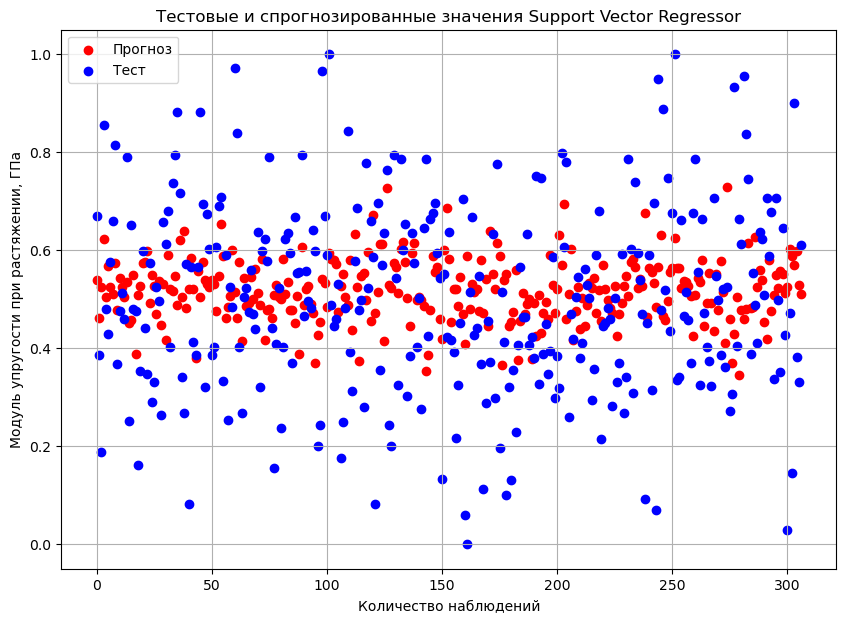

In [60]:
# визуализируем настоящие (отмечены синим цветом) и прогнозные значения (отмечены красным цветом)
plt.figure(figsize = (10, 7))
plt.title("Тестовые и спрогнозированные значения Support Vector Regressor")
plt.scatter(y_pred.index, y_pred, label = "Прогноз", color = "r")
plt.scatter(y_scaled_test.index, y_scaled_test, label = "Тест", color = "b")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

Вывод:
судя по визуализации, результат лучше, чем при применении линейной функции для прогнозирования, но по метрикам прогноз модели хуже наивного.

In [61]:
# добавим в таблицу данные по этой модели
metrics_df.loc[len(metrics_df.index)] = ['Support Vector Regressor', svr_rmse, svr_r2_score] 
metrics_df


,Регрессор,RMSE,r2 score
0,Linear_Regression,0.190390,0.016809
1,Linear_Regression_sample_normalization,3.126316,0.019888
2,Linear_Regression_categ_angle,0.190390,0.016809
3,Linear_Regression_sample_normalization_categ_a...,3.126312,0.019890
4,Support Vector Regressor,0.198266,-0.066223


In [62]:
# посмотрим, будет ли изменение качества прогноза нелинейной модели при использовании функции normalize()
# разобъем наборы на тестовую и тренировочную выборки (на 30% и 70%, соответственно, по условиям задачи)
df_norm_y = df[['Модуль упругости при растяжении, ГПа']]
x_norm_train, x_norm_test, y_norm_train, y_norm_test = train_test_split(df_norm_x, df_norm_y, train_size=0.7, random_state=73)

In [63]:
# проверим размерность получившихся массивов 
print(x_norm_train.shape)
print(x_norm_test.shape)
print(y_norm_train.shape)
print(y_norm_test.shape)

(716, 12)
(307, 12)
(716, 1)
(307, 1)


In [64]:
# обучим модель
y_norm_train = np.array(y_norm_train).ravel()
svr = SVR(kernel = 'rbf', C = 50, epsilon= 0.3)
svr.fit(x_norm_train, y_norm_train)

SVR(C=50, epsilon=0.3)

In [65]:
# спрогнозируем значения модули упругости при растяжении
y_pred = svr.predict(x_norm_test)

In [66]:
# используем встроенные в библиотеку sklearn метрики для вычисления ошибки
svr_norm_rmse = np.sqrt(metrics.mean_squared_error(y_norm_test, y_pred))
svr_norm_r2_score = r2_score(y_norm_test, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_norm_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_norm_test, y_pred))
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_norm_test, y_pred)))
print('r2 score:', r2_score(y_norm_test, y_pred))

Mean Absolute Error: 2.5227461993937377
Mean Squared Error: 9.95952262511624
Root Mean Squared Error: 3.1558711356955373
r2 score: 0.015510205304546165


In [67]:
# преобразуем массив в таблицу pandas
y_pred = pd.DataFrame(y_pred)
y_pred.head(3)

,0
0,73.298386
1,73.458832
2,73.416337


In [68]:
# преобразуем массив тестовых данных в таблицу pandas
y_norm_test = pd.DataFrame(y_norm_test).reset_index(drop=True)
y_norm_test.head(3)

,"Модуль упругости при растяжении, ГПа"
0,76.099697
1,71.444581
2,68.166534


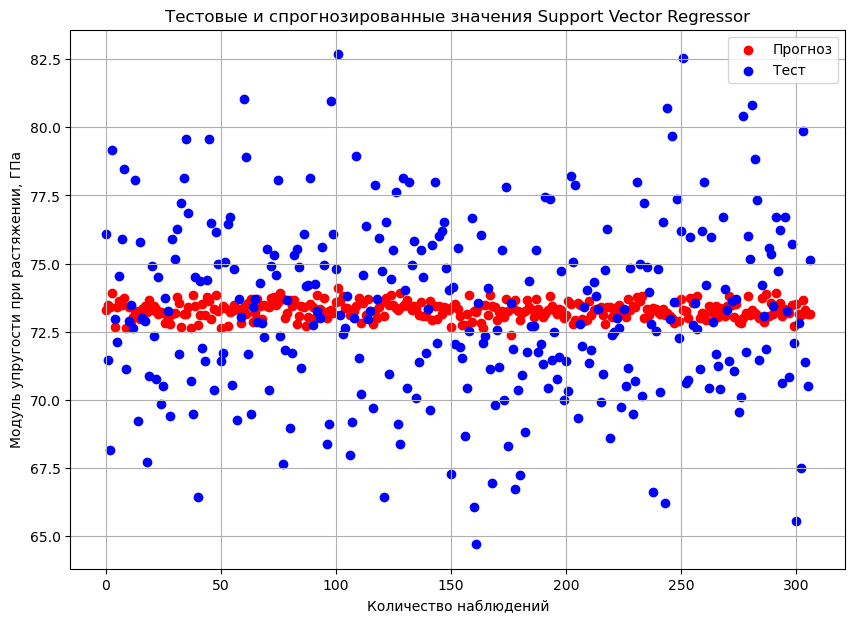

In [69]:
# визуализируем настоящие (отмечены синим цветом) и прогнозные значения (отмечены красным цветом)
plt.figure(figsize = (10, 7))
plt.title("Тестовые и спрогнозированные значения Support Vector Regressor")
plt.scatter(y_pred.index, y_pred, label = "Прогноз", color = "r")
plt.scatter(y_norm_test.index, y_norm_test, label = "Тест", color = "b")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [70]:
# добавим в таблицу данные по этой модели
metrics_df.loc[len(metrics_df.index)] = ['Support Vector Regressor_sample_normalization', svr_norm_rmse, svr_norm_r2_score] 
metrics_df

,Регрессор,RMSE,r2 score
0,Linear_Regression,0.190390,0.016809
1,Linear_Regression_sample_normalization,3.126316,0.019888
2,Linear_Regression_categ_angle,0.190390,0.016809
3,Linear_Regression_sample_normalization_categ_a...,3.126312,0.019890
4,Support Vector Regressor,0.198266,-0.066223
5,Support Vector Regressor_sample_normalization,3.155871,0.015510


In [71]:
# попробуем использовать датасет со значениями в столбце "Угол нашивки" категориального характера
# повторно выполним нормализацию отдельно для зависимой и независимых переменных, так как ранее значения этих переменных уже менялись
# сформируем датасеты независимых признаков - x и y для зависимой переменной - модуль упругости при растяжении
min_max_scaler_x = preprocessing.MinMaxScaler()
min_max_scaler_y = preprocessing.MinMaxScaler()

df_scaled_x = min_max_scaler_x.fit_transform(df_categ_angle.loc[:, df_categ_angle.columns != 'Модуль упругости при растяжении, ГПа'])
df_scaled_y = min_max_scaler_y.fit_transform(df_categ_angle[['Модуль упругости при растяжении, ГПа']])

In [72]:
# разобъем наборы на тестовую и тренировочную выборки (на 30% и 70%, соответственно, по условиям задачи)
x_scaled_train, x_scaled_test, y_scaled_train, y_scaled_test = train_test_split(df_scaled_x, df_scaled_y, train_size=0.7, random_state=73)

In [73]:
# проверим размерность получившихся массивов 
print(x_scaled_train.shape)
print(x_scaled_test.shape)
print(y_scaled_train.shape)
print(y_scaled_test.shape)

(716, 12)
(307, 12)
(716, 1)
(307, 1)


In [74]:
# обучим модель
y_scaled_train = np.array(y_scaled_train).ravel()
svr = SVR(kernel = 'rbf', C = 50, epsilon= 0.3)
svr.fit(x_scaled_train, y_scaled_train)

SVR(C=50, epsilon=0.3)

In [75]:
# спрогнозируем значения модули упругости при растяжении
y_pred = svr.predict(x_scaled_test)

In [76]:
# используем встроенные в библиотеку sklearn метрики для вычисления ошибки
svr_categ_angle_rmse = np.sqrt(metrics.mean_squared_error(y_scaled_test, y_pred))
svr_categ_angle_r2_score = r2_score(y_scaled_test, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_scaled_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_scaled_test, y_pred))
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_scaled_test, y_pred)))
print('r2 score:', r2_score(y_scaled_test, y_pred))

Mean Absolute Error: 0.15848031907696153
Mean Squared Error: 0.0393095390722181
Root Mean Squared Error: 0.1982663336833011
r2 score: -0.06622346028897641


In [77]:
# преобразуем массив в таблицу pandas
y_pred = pd.DataFrame(y_pred)
y_pred.head(3)

,0
0,0.538464
1,0.462394
2,0.523946


In [78]:
# преобразуем массив тестовых данных в таблицу pandas
y_scaled_test = pd.DataFrame(y_scaled_test)
y_scaled_test.head(3)

,0
0,0.670182
1,0.387134
2,0.187817


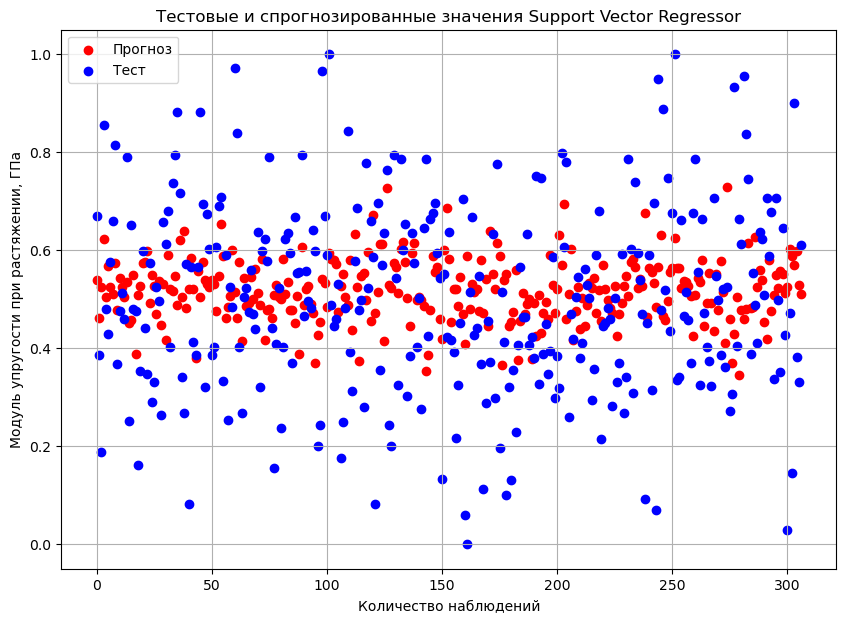

In [79]:
# визуализируем настоящие (отмечены синим цветом) и прогнозные значения (отмечены красным цветом)
plt.figure(figsize = (10, 7))
plt.title("Тестовые и спрогнозированные значения Support Vector Regressor")
plt.scatter(y_pred.index, y_pred, label = "Прогноз", color = "r")
plt.scatter(y_scaled_test.index, y_scaled_test, label = "Тест", color = "b")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [80]:
# добавим в таблицу данные по этой модели
metrics_df.loc[len(metrics_df.index)] = ['Support Vector Regressor_categ_angle', svr_categ_angle_rmse, svr_categ_angle_r2_score] 
metrics_df

,Регрессор,RMSE,r2 score
0,Linear_Regression,0.190390,0.016809
1,Linear_Regression_sample_normalization,3.126316,0.019888
2,Linear_Regression_categ_angle,0.190390,0.016809
3,Linear_Regression_sample_normalization_categ_a...,3.126312,0.019890
4,Support Vector Regressor,0.198266,-0.066223
5,Support Vector Regressor_sample_normalization,3.155871,0.015510
6,Support Vector Regressor_categ_angle,0.198266,-0.066223


Выводы:
- очевидно, что эта модель повторяет прогноз модели, где значения в столбце "Угол нашивки" - непрерывные. Таким образом, в дальнейшем нет смысла трансформировать этот столбец и ограничивать модель;
- добавление нелинейности в модель прогноз немного улучшило, но по метрикам он остается неудовлетворительным.

#### Random Forest Regressor model

Попробуем применить ансамблевые методы. Метод случайного леса позволяет работать с нелинейными зависимостями, при этом не требует масштабирования и, учитывая небольшой размер данного датасета, не потребует много ресусрсов для выполнения.

In [81]:
# разделим датасет, получившийся после работы с выбросами, на зависимую и независимые переменные
df_x = df.drop('Модуль упругости при растяжении, ГПа', axis=1)
df_y = df['Модуль упругости при растяжении, ГПа']

In [82]:
df_x.head(3)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.0,22.267857,100.000000,210.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.0,23.750000,284.615385,210.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.9,33.000000,284.615385,210.0,3000.0,220.0,0,4.0,70.0


In [83]:
df_y.head(3)

0    70.0
1    70.0
2    70.0
Name: Модуль упругости при растяжении, ГПа, dtype: float64

In [84]:
# разобъем наборы на тестовую и тренировочную выборки (на 30% и 70%, соответственно, по условиям задачи)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, train_size=0.7, random_state=73)

In [85]:
# проверим размерность получившихся массивов 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(716, 12)
(307, 12)
(716,)
(307,)


In [86]:
# обучим модель
# учитывая небольшой размер датасета, возьмем достаточно большое количество деревьев и среднее значение max_depth для предупреждения переобучения
rfr = RandomForestRegressor(n_estimators=10000, max_depth=5, random_state=73)
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10000, random_state=73)

In [87]:
# спрогнозируем значения модули упругости при растяжении
y_pred = rfr.predict(x_test)

In [88]:
# используем встроенные в библиотеку sklearn метрики для вычисления ошибки
rfr_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rfr_r2_score = r2_score(y_test, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 2.51773160420993
Mean Squared Error: 10.063821675804228
Root Mean Squared Error: 3.1723527035631185
r2 score: 0.0052003385705921


In [89]:
# преобразуем массив в таблицу pandas
y_pred = pd.DataFrame(y_pred)
y_pred.head(3)

,0
0,73.129791
1,73.170787
2,73.795769


In [90]:
# преобразуем массив тестовых данных в таблицу pandas
y_test = pd.DataFrame(y_test).reset_index(drop=True)
y_test.head(3)

,"Модуль упругости при растяжении, ГПа"
0,76.099697
1,71.444581
2,68.166534


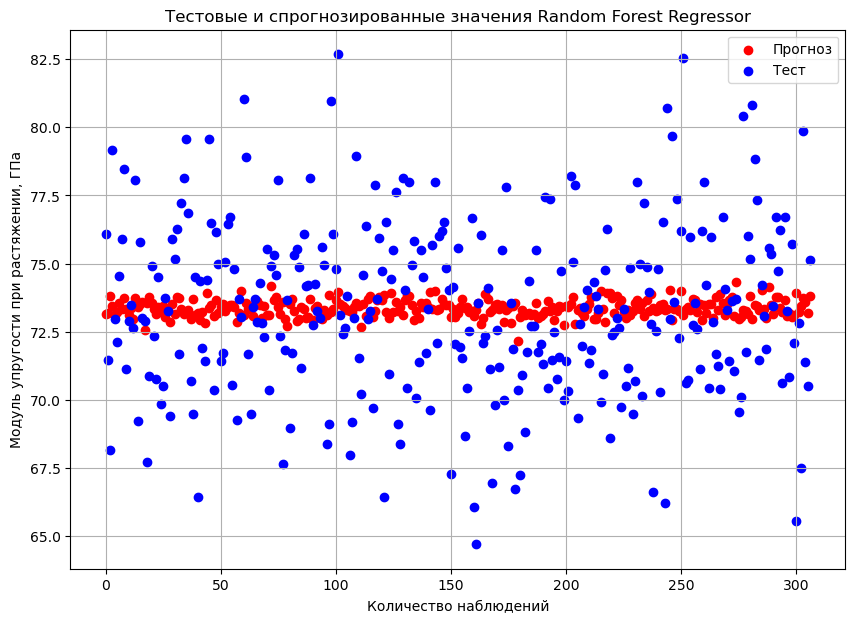

In [91]:
# визуализируем настоящие (отмечены синим цветом) и прогнозные значения (отмечены красным цветом)
plt.figure(figsize = (10, 7))
plt.title("Тестовые и спрогнозированные значения Random Forest Regressor")
plt.scatter(y_pred.index, y_pred, label = "Прогноз", color = "r")
plt.scatter(y_test.index, y_test, label = "Тест", color = "b")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [92]:
# добавим в таблицу данные по этой модели
metrics_df.loc[len(metrics_df.index)] = ['Random Forest Regressor', rfr_rmse, rfr_r2_score] 
metrics_df

,Регрессор,RMSE,r2 score
0,Linear_Regression,0.190390,0.016809
1,Linear_Regression_sample_normalization,3.126316,0.019888
2,Linear_Regression_categ_angle,0.190390,0.016809
3,Linear_Regression_sample_normalization_categ_a...,3.126312,0.019890
4,Support Vector Regressor,0.198266,-0.066223
5,Support Vector Regressor_sample_normalization,3.155871,0.015510
6,Support Vector Regressor_categ_angle,0.198266,-0.066223
7,Random Forest Regressor,3.172353,0.005200


Вывод:
прогноз модели настолько плох, что масштабирование его не улучшит.

#### KNeighbors Regressor model

Попробуем метод, основанный на определении расстояния между значениями и поиске ближайших для прогноза зависимой переменной. Метод не требует наличия линейных зависимостей, явное наличие которых при разведочном анализе данных доказать не удалось.

In [93]:
# учитывая принцип работы метода, для обучения модели проведем масштабирование данных
# сформируем датасеты независимых признаков - x и y для зависимой переменной - модуль упругости при растяжении
min_max_scaler_x = preprocessing.MinMaxScaler()
min_max_scaler_y = preprocessing.MinMaxScaler()

df_scaled_x = min_max_scaler_x.fit_transform(df.drop('Модуль упругости при растяжении, ГПа', axis=1))
df_scaled_y = min_max_scaler_y.fit_transform(df[['Модуль упругости при растяжении, ГПа']])

In [94]:
# посмотрим на массив с независимыми признаками
df_scaled_x[:3]

array([[0.28213084, 0.62653324, 0.38567917, 0.0676537 , 0.42746681,
        0.        , 0.14968224, 0.69823491, 0.48897856, 0.        ,
        0.2769983 , 0.54813542],
       [0.28213084, 0.62653324, 0.38567917, 0.1780211 , 0.50653546,
        0.58931072, 0.14968224, 0.69823491, 0.48897856, 0.        ,
        0.2769983 , 0.57698465],
       [0.28213084, 0.62653324, 0.38567917, 0.17746926, 1.        ,
        0.58931072, 0.14968224, 0.69823491, 0.48897856, 0.        ,
        0.2769983 , 0.67314876]])

In [95]:
# посмотрим на набор значений зависимой переменной
df_scaled_y[:3]

array([[0.31919382],
       [0.31919382],
       [0.31919382]])

In [96]:
# разобъем наборы на тестовую и тренировочную выборки (на 30% и 70%, соответственно, по условиям задачи)
x_scaled_train, x_scaled_test, y_scaled_train, y_scaled_test = train_test_split(df_scaled_x, df_scaled_y, train_size=0.7, random_state=73)

In [97]:
# проверим размерность получившихся массивов 
print(x_scaled_train.shape)
print(x_scaled_test.shape)
print(y_scaled_train.shape)
print(y_scaled_test.shape)

(716, 12)
(307, 12)
(716, 1)
(307, 1)


In [98]:
# обучим модель
# учитывая размер датасета, возьмем 14 соседей в качестве параметра
knn = KNeighborsRegressor(n_neighbors=14)
knn.fit(x_scaled_train, y_scaled_train)

KNeighborsRegressor(n_neighbors=14)

In [99]:
# спрогнозируем значения модули упругости при растяжении
y_pred = knn.predict(x_scaled_test)

In [100]:
# используем встроенные в библиотеку sklearn метрики для вычисления ошибки
knn_rmse = np.sqrt(metrics.mean_squared_error(y_scaled_test, y_pred))
knn_r2_score = r2_score(y_scaled_test, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_scaled_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_scaled_test, y_pred))
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_scaled_test, y_pred)))
print('r2 score:', r2_score(y_scaled_test, y_pred))

Mean Absolute Error: 0.13809240664245964
Mean Squared Error: 0.029645265963748883
Root Mean Squared Error: 0.1721780066203256
r2 score: -0.016857418616232023


In [101]:
# преобразуем массив в таблицу pandas
y_pred = pd.DataFrame(y_pred)
y_pred.head(3)

,0
0,0.457609
1,0.441912
2,0.497708


In [102]:
# преобразуем массив тестовых данных в таблицу pandas
y_scaled_test = pd.DataFrame(y_scaled_test)
y_scaled_test.head(3)

,0
0,0.646642
1,0.396743
2,0.220768


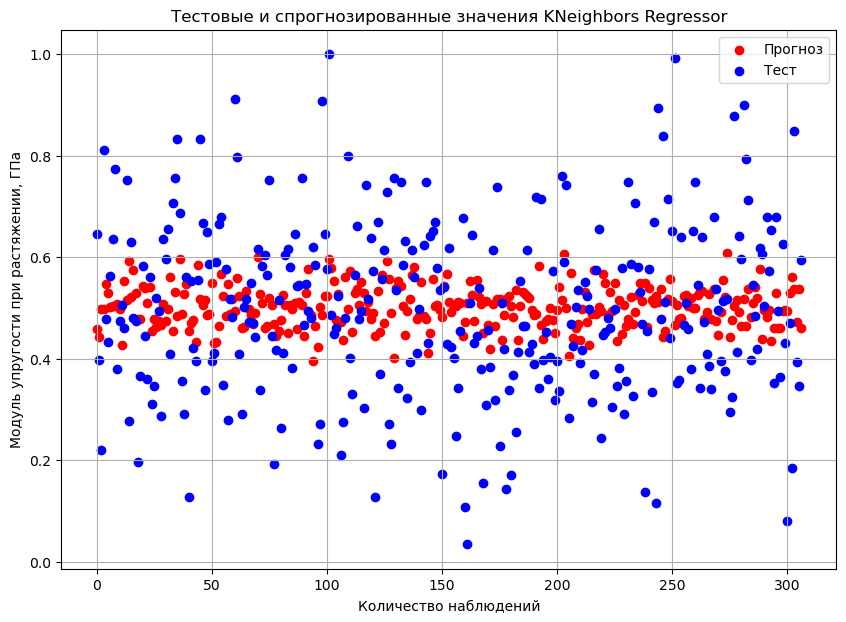

In [103]:
# визуализируем настоящие (отмечены синим цветом) и прогнозные значения (отмечены красным цветом)
plt.figure(figsize = (10, 7))
plt.title("Тестовые и спрогнозированные значения KNeighbors Regressor")
plt.scatter(y_pred.index, y_pred, label = "Прогноз", color = "r")
plt.scatter(y_scaled_test.index, y_scaled_test, label = "Тест", color = "b")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [104]:
# добавим в таблицу данные по этой модели
metrics_df.loc[len(metrics_df.index)] = ['KNeighbors Regressor', knn_rmse, knn_r2_score] 
metrics_df

,Регрессор,RMSE,r2 score
0,Linear_Regression,0.190390,0.016809
1,Linear_Regression_sample_normalization,3.126316,0.019888
2,Linear_Regression_categ_angle,0.190390,0.016809
3,Linear_Regression_sample_normalization_categ_a...,3.126312,0.019890
4,Support Vector Regressor,0.198266,-0.066223
5,Support Vector Regressor_sample_normalization,3.155871,0.015510
6,Support Vector Regressor_categ_angle,0.198266,-0.066223
7,Random Forest Regressor,3.172353,0.005200
8,KNeighbors Regressor,0.172178,-0.016857


Выводы:
- ни одна из использованных моделей не дала удовлетворительного результата;
- указанную ошибку трудно интерпретировать, так как она подсчитана на нормализованных разными способами данных;
- использовать другие регрессоры будет затратным по времени, но скорее всего не отразится на точности прогноза, как и раличные модификации этапа подготовки данных.

Попробуем подбор гиперпараметров и используем другой подход: ансамблевый метод градиентного бустинга. 
В классическом варианте метод больше подходит для классификации, 
но с аккуратным побдором гиперпараметров и с учетом, что остальные модели не подошли или по логике их работы точно не подойдут 
(например, лассо регрессор), попробуем прибегнуть к этому способу.

#### Gradient Boosting Regressor model

В машинном обучении гиперпараметрами называют параметры алгоритмов, значения которых устанавливаются перед запуском процесса обучения. 
Необходимо создать словарь для последующего подбора оптимальных значений по сетке.

In [105]:
# проверим датасет, который был сохранен ранее
df_x.head(3)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.0,22.267857,100.000000,210.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.0,23.750000,284.615385,210.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.9,33.000000,284.615385,210.0,3000.0,220.0,0,4.0,70.0


In [106]:
# сформируем набор значений зависимой переменной
df_y = df['Модуль упругости при растяжении, ГПа']
df_y.head(3)

0    70.0
1    70.0
2    70.0
Name: Модуль упругости при растяжении, ГПа, dtype: float64

In [107]:
# разобъем наборы на тестовую и тренировочную выборки (на 30% и 70%, соответственно, по условиям задачи)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, train_size=0.7, random_state=73)

In [108]:
# проверим размерность получившихся массивов 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(716, 12)
(307, 12)
(716,)
(307,)


In [109]:
# создадим словарь для гиперпараметров будущей модели
parameters = {'n_estimators': [100, 300],
             'max_depth': [3, 5, 8], 'learning_rate': [0.01, 0.1],
              'subsample': [0.5, 1]}

In [110]:
# создаем экземпляр класса
gbr = GradientBoostingRegressor()

In [155]:
# проведем поиск по сетке с перекрестной проверкой, количество блоков равно 10 (cv = 10) по условию задачи
grid = GridSearchCV(estimator = gbr, param_grid = parameters, cv = 10, verbose = 1, scoring = 'r2')
grid.fit(x_train, y_train)
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
display(grid)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best parameters are: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}


-0.043 + or -0.029 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
-0.038 + or -0.039 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
-0.066 + or -0.024 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.5}
-0.066 + or -0.043 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1}
-0.043 + or -0.026 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.5}
-0.053 + or -0.049 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1}
-0.092 + or -0.047 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.5}
-0.082 + or -0.057 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 

In [156]:
# выведем лучшую модель
print(grid.best_estimator_)

GradientBoostingRegressor(learning_rate=0.01, subsample=1)


In [111]:
# подставим найденные гиперпараметры в модель, 'max_depth': 3, 'n_estimators': 100 - по умолчанию
gbr = GradientBoostingRegressor(learning_rate=0.01, subsample=1)
gbr.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, subsample=1)

In [116]:
# спрогнозируем значения модули упругости при растяжении
y_pred = gbr.predict(x_test)

In [117]:
# используем встроенные в библиотеку sklearn метрики для вычисления ошибки
gbr_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
gbr_r2_score = r2_score(y_test, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 2.521188362796842
Mean Squared Error: 10.011594038445232
Root Mean Squared Error: 3.1641103075659722
r2 score: 0.010362993239533935


In [118]:
# преобразуем массив в таблицу pandas
y_pred = pd.DataFrame(y_pred)
y_pred.head(3)

,0
0,73.415606
1,73.283858
2,73.478341


In [119]:
# преобразуем массив тестовых данных в таблицу pandas
y_test = pd.DataFrame(y_test).reset_index(drop=True)
y_test.head(3)

,"Модуль упругости при растяжении, ГПа"
0,76.099697
1,71.444581
2,68.166534


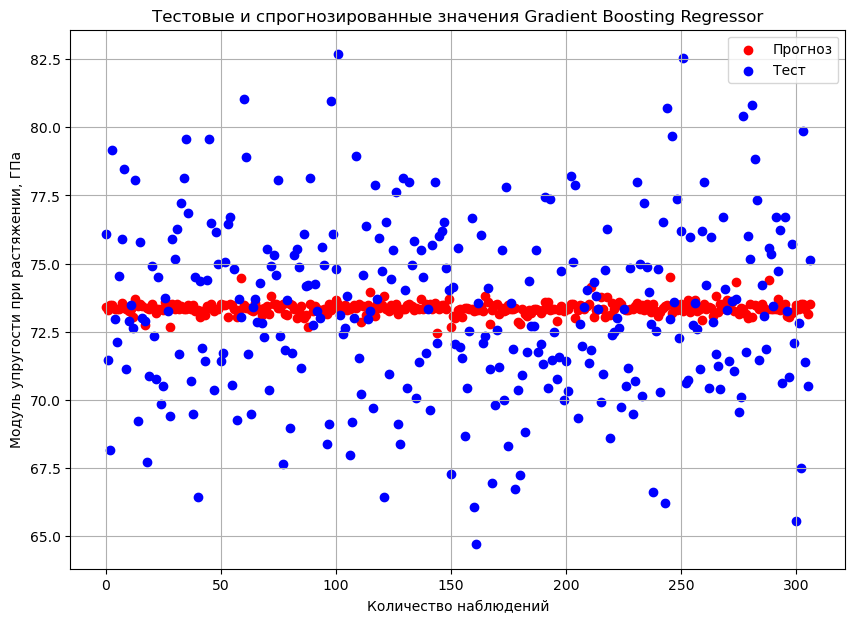

In [120]:
# визуализируем настоящие (отмечены синим цветом) и прогнозные значения (отмечены красным цветом)
plt.figure(figsize = (10, 7))
plt.title("Тестовые и спрогнозированные значения Gradient Boosting Regressor")
plt.scatter(y_pred.index, y_pred, label = "Прогноз", color = "r")
plt.scatter(y_test.index, y_test, label = "Тест", color = "b")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [121]:
# добавим в таблицу данные по этой модели
metrics_df.loc[len(metrics_df.index)] = ['Gradient Boosting Regressor', gbr_rmse, gbr_r2_score] 
metrics_df

,Регрессор,RMSE,r2 score
0,Linear_Regression,0.190390,0.016809
1,Linear_Regression_sample_normalization,3.126316,0.019888
2,Linear_Regression_categ_angle,0.190390,0.016809
3,Linear_Regression_sample_normalization_categ_a...,3.126312,0.019890
4,Support Vector Regressor,0.198266,-0.066223
5,Support Vector Regressor_sample_normalization,3.155871,0.015510
6,Support Vector Regressor_categ_angle,0.198266,-0.066223
7,Random Forest Regressor,3.172353,0.005200
8,KNeighbors Regressor,0.172178,-0.016857
9,Gradient Boosting Regressor,3.164110,0.010363


#### Support Vector Regressor model (+GridSearch)

Попробуем подобрать гиперпараметры для визуально наиболее подходящего под задачу регрессора - Метод опорных векторов.

In [122]:
# будем использовать нормализованный с помощью MinMaxScaler() датасет, оставив столбец "Угол нашивки" в качестве непрерывной переменной
# разобъем наборы на тестовую и тренировочную выборки (на 30% и 70%, соответственно, по условиям задачи)
x_scaled_train, x_scaled_test, y_scaled_train, y_scaled_test = train_test_split(df_scaled_x, df_scaled_y, train_size=0.7, random_state=73)

In [123]:
# проверим размерность получившихся массивов 
print(x_scaled_train.shape)
print(x_scaled_test.shape)
print(y_scaled_train.shape)
print(y_scaled_test.shape)

(716, 12)
(307, 12)
(716, 1)
(307, 1)


In [124]:
# создадим словарь для гиперпараметров будущей модели
parameters = {'C': [30, 50, 100, 200],
             'gamma': ['scale', 'auto'], 'epsilon': [0.1, 0.3, 0.7, 1]}

In [125]:
# создадим экземпляр класса
svr = SVR()

In [126]:
# приведем массив значений зависимой переменной к нужному формату
y_scaled_train = y_scaled_train.ravel()
y_scaled_train[:3]

array([0.52171738, 0.51317119, 0.62320596])

In [187]:
# проведем поиск по сетке с перекрестной проверкой, количество блоков равно 10 (cv = 10) по условию задачи
grid = GridSearchCV(estimator = svr, param_grid = parameters, cv = 10, verbose = 1, scoring = 'r2')
grid.fit(x_scaled_train, y_scaled_train)
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
display(grid)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best parameters are: {'C': 30, 'epsilon': 0.7, 'gamma': 'scale'}


-1.081 + or -0.416 for the {'C': 30, 'epsilon': 0.1, 'gamma': 'scale'}
-0.112 + or -0.105 for the {'C': 30, 'epsilon': 0.1, 'gamma': 'auto'}
-0.112 + or -0.069 for the {'C': 30, 'epsilon': 0.3, 'gamma': 'scale'}
-0.088 + or -0.088 for the {'C': 30, 'epsilon': 0.3, 'gamma': 'auto'}
-0.024 + or -0.018 for the {'C': 30, 'epsilon': 0.7, 'gamma': 'scale'}
-0.024 + or -0.018 for the {'C': 30, 'epsilon': 0.7, 'gamma': 'auto'}
-0.024 + or -0.018 for the {'C': 30, 'epsilon': 1, 'gamma': 'scale'}
-0.024 + or -0.018 for the {'C': 30, 'epsilon': 1, 'gamma': 'auto'}
-1.183 + or -0.509 for the {'C': 50, 'epsilon': 0.1, 'gamma': 'scale'}
-0.148 + or -0.112 for the {'C': 50, 'epsilon': 0.1, 'gamma': 'auto'}
-0.112 + or -0.069 for the {'C': 50, 'epsilon': 0.3, 'gamma': 'scale'}
-0.11 + or -0.112 for the {'C': 50, 'epsilon': 0.3, 'gamma': 'auto'}
-0.024 + or -0.018 for the {'

In [188]:
# выведем лучшую модель
print(grid.best_estimator_)

SVR(C=30, epsilon=0.7)


In [127]:
# обучим модель
svr = SVR(kernel = 'rbf', C = 30, epsilon= 0.7)
svr.fit(x_scaled_train, y_scaled_train)

SVR(C=30, epsilon=0.7)

In [128]:
# спрогнозируем значения модули упругости при растяжении
y_pred = svr.predict(x_scaled_test)

In [129]:
# используем встроенные в библиотеку sklearn метрики для вычисления ошибки
svr_rmse = np.sqrt(metrics.mean_squared_error(y_scaled_test, y_pred))
svr_r2_score = r2_score(y_scaled_test, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_scaled_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_scaled_test, y_pred))
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_scaled_test, y_pred)))
print('r2 score:', r2_score(y_scaled_test, y_pred))

Mean Absolute Error: 0.13599887824726542
Mean Squared Error: 0.029224577237522385
Root Mean Squared Error: 0.17095197348238594
r2 score: -0.0024274434318392046


In [130]:
# преобразуем массив в таблицу pandas
y_pred = pd.DataFrame(y_pred)
y_pred.head(3)

,0
0,0.48807
1,0.48807
2,0.48807


In [131]:
# преобразуем массив тестовых данных в таблицу pandas
y_scaled_test = pd.DataFrame(y_scaled_test)
y_scaled_test.head(3)

,0
0,0.646642
1,0.396743
2,0.220768


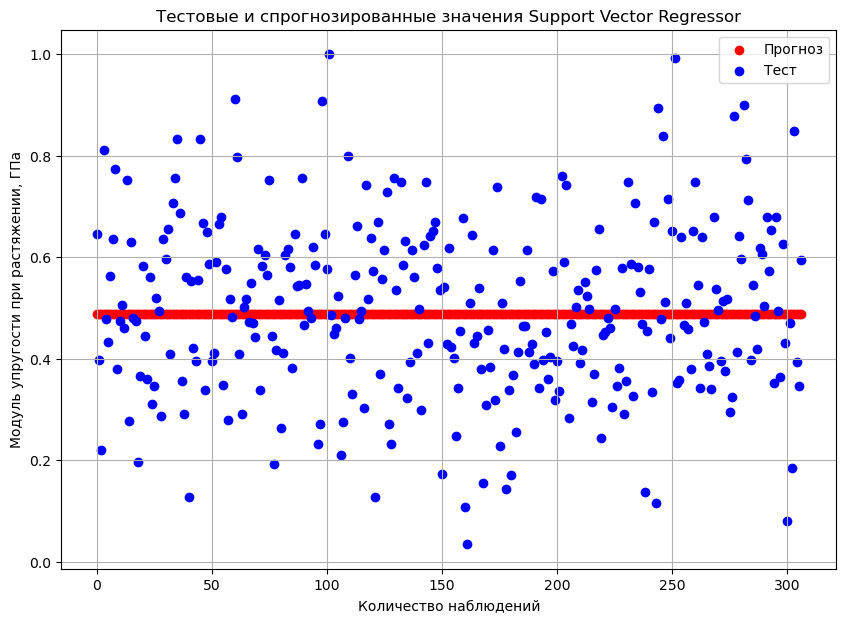

In [132]:
# визуализируем настоящие (отмечены синим цветом) и прогнозные значения (отмечены красным цветом)
plt.figure(figsize = (10, 7))
plt.title("Тестовые и спрогнозированные значения Support Vector Regressor")
plt.scatter(y_pred.index, y_pred, label = "Прогноз", color = "r")
plt.scatter(y_scaled_test.index, y_scaled_test, label = "Тест", color = "b")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [133]:
# добавим в таблицу данные по этой модели
metrics_df.loc[len(metrics_df.index)] = ['Support Vector Regressor + GridSearch', svr_rmse, svr_r2_score] 
metrics_df

,Регрессор,RMSE,r2 score
0,Linear_Regression,0.190390,0.016809
1,Linear_Regression_sample_normalization,3.126316,0.019888
2,Linear_Regression_categ_angle,0.190390,0.016809
3,Linear_Regression_sample_normalization_categ_a...,3.126312,0.019890
4,Support Vector Regressor,0.198266,-0.066223
5,Support Vector Regressor_sample_normalization,3.155871,0.015510
6,Support Vector Regressor_categ_angle,0.198266,-0.066223
7,Random Forest Regressor,3.172353,0.005200
8,KNeighbors Regressor,0.172178,-0.016857
9,Gradient Boosting Regressor,3.164110,0.010363


**Заключение**: ни одной из моделей, даже при подборе гиперпарамтеров и различных способах подготовки данных, не удалось обучиться. 

Вероятно, написание нейронной сети помогло бы решить данную задачу. 

Тем не менее, в процессе создания множества вариантов моделей обнаружен способ повышения точности прогноза: использование зависимой переменной для расчета L2 нормы при нормализации. При этом при обучении используются неизмененные значения зависимой переменной. Точность такого прогноза повышается до 0.79. Однако, наиболее вероятно, что такая модель не способона на экстраполяции и покажет плохую работу в продакшн из-за некорректного расчета значений векторов при нормализации.
Приведем ниже вычисления и результаты прогноза для наглядности.

In [134]:
# загрузим датасет, нормализованным по рядам таблицы
df_norm = pd.read_csv('/Users/kusita_1/Desktop/df compositum norm.csv', index_col=0)
df_norm.head(3)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.000500,0.546440,0.198855,0.009829,0.005994,0.047958,0.056528,0.018843,0.807547,0.059220,0.0,0.001077,0.015343
1,0.000499,0.545436,0.198490,0.013434,0.006381,0.076473,0.056424,0.018808,0.806064,0.059111,0.0,0.001075,0.016121
2,0.000499,0.545406,0.198478,0.013407,0.007790,0.076468,0.056421,0.018807,0.806018,0.059108,0.0,0.001075,0.018807


In [135]:
# разобъем наборы на тестовую и тренировочную выборки (на 30% и 70%, соответственно, по условиям задачи)
df_norm_y = df_norm[['Модуль упругости при растяжении, ГПа']]
df_norm_x = df_norm.drop('Модуль упругости при растяжении, ГПа', axis=1)
x_norm_train, x_norm_test, y_norm_train, y_norm_test = train_test_split(df_norm_x, df_norm_y, train_size=0.7, random_state=73)

In [136]:
# обучим модель
lr = LinearRegression()
lr.fit(x_norm_train, y_norm_train)

LinearRegression()

In [137]:
# спрогнозируем значения 
y_pred = lr.predict(x_norm_test)

In [138]:
# используем встроенные в библиотеку sklearn метрики для вычисления ошибки
lr_norm_rmse = np.sqrt(metrics.mean_squared_error(y_norm_test, y_pred))
lr_norm_r2_score = r2_score(y_norm_test, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_norm_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_norm_test, y_pred))
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_norm_test, y_pred)))
print('r2 score:', r2_score(y_norm_test, y_pred))

Mean Absolute Error: 0.0009212450121272181
Mean Squared Error: 1.3706811052176924e-06
Root Mean Squared Error: 0.0011707609086477446
r2 score: 0.7915501270761572


In [139]:
# преобразуем массив в таблицу pandas
y_pred = pd.DataFrame(y_pred)
y_pred.head(3)

,0
0,0.020601
1,0.022861
2,0.017477


In [140]:
# преобразуем массив тестовых данных в таблицу pandas
y_norm_test = pd.DataFrame(y_norm_test).reset_index(drop=True)
y_norm_test.head(3)

,"Модуль упругости при растяжении, ГПа"
0,0.020785
1,0.021935
2,0.015402


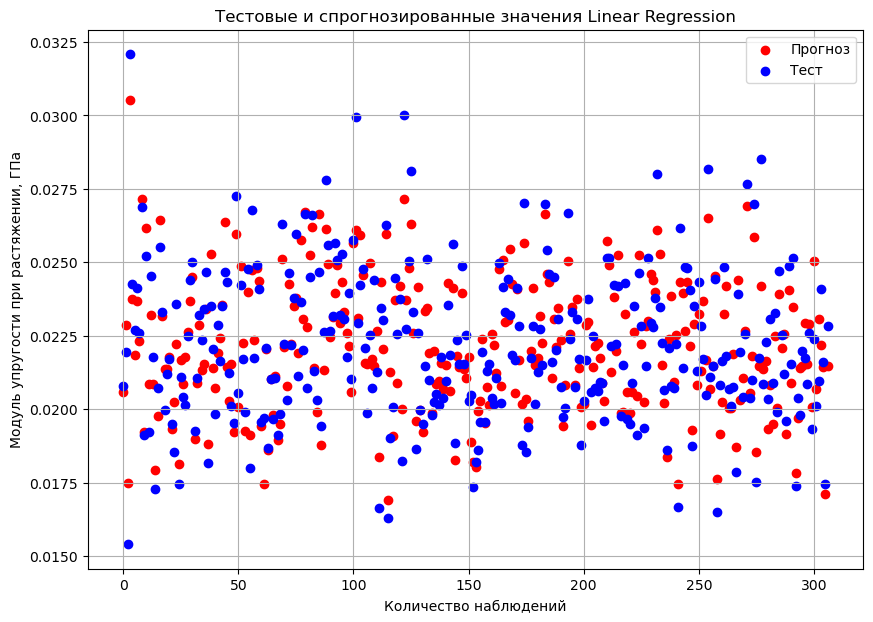

In [141]:
# визуализируем настоящие (отмечены синим цветом) и прогнозные значения (отмечены красным цветом)
y_pred = pd.DataFrame(y_pred)
y_norm_test = pd.DataFrame(y_norm_test)
plt.figure(figsize = (10, 7))
plt.title("Тестовые и спрогнозированные значения Linear Regression")
plt.scatter(y_pred.index, y_pred, label = "Прогноз", color = "r")
plt.scatter(y_norm_test.index, y_norm_test, label = "Тест", color = "b")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);